In [ ]:
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('max_columns', 100)

In [ ]:
!pip install jcopml jcopdl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv('/home/dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(17918, 31)

In [ ]:
df.Class.value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

In [ ]:
df.loc[df.isna().any(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
17917,29031,1.050204,0.078269,0.484733,1.349623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2 = df.copy()

In [ ]:
df2.dropna(inplace=True)
df2.isna().sum()

# Create SImple model
we have to create a non robust model for our baseline, without doing anything (EDA, FS dll)

In [ ]:
X = df2.drop(columns="Class")
y = df2.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14333, 30), (3584, 30), (14333,), (3584,))

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), X_train.columns)
])

In [ ]:
from sklearn.svm import SVC
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

In [ ]:
# check params : run this pipeline.get_params()
params = {
    'algo__gamma' : np.logspace(-3,3,7),
    'algo__C' : np.logspace(-3,3,7),
    'algo__class_weight' : [{0.0:x, 1.0:1-x} for x in [0.01, 0.05, 0.1]]
}

In [ ]:

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, params, cv=3, scoring='f1', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 147 candidates, totalling 441 fits
{'algo__C': 100.0, 'algo__class_weight': {0.0: 0.1, 1.0: 0.9}, 'algo__gamma': 0.01}
0.9552238805970149 0.8786111474710454 0.8333333333333334


In [ ]:
model.best_score_

0.8786111474710454

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3568
         1.0       0.75      0.94      0.83        16

    accuracy                           1.00      3584
   macro avg       0.87      0.97      0.92      3584
weighted avg       1.00      1.00      1.00      3584



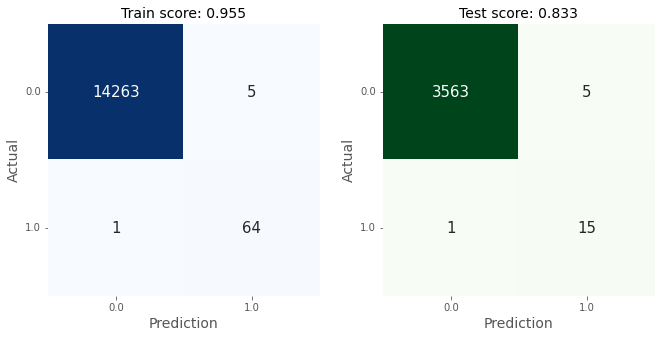

In [ ]:
from jcopml.plot import plot_confusion_matrix

plot_confusion_matrix(X_train, y_train, X_test, y_test, model)